In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

import model
import helper

In [12]:
model_copy_vae = model.VaeFinal_only_one_hidden_copy()
model_copy_vae = helper.import_model_name_weights_copy(model_x=model_copy_vae, activate_eval=True)

# model_copy
model_copy = model.VaeFinal_only_one_hidden_copy()
model_copy = helper.import_model_name_weights_copy(model_x=model_copy, activate_eval=True)

In [13]:
import MyDataSet
import pandas as pd
import torch
# dataset_test_4 = MyDataSet.MyDataSets_Subset_4(batch_size_train=-1)
with torch.no_grad():
    dataset_49 = MyDataSet.MyDataSets_Subset_4_9(batch_size_train=-1)
    # dataset_test_9 = MyDataSet.MyDataSets_Subset_9(batch_size_train=-1)
    img_49_batch, label_49_batch = next(iter(dataset_49.train_loader_subset_changed_labels))
    rec49,mu49,sigma49 = model_copy(img_49_batch.clone())
    z = mu49
    print(f'{mu49.shape = }')
    print(f'{z.shape = }')
    print(f'{label_49_batch.shape = }')
    # df = pd.read_csv(lattent)

MyDataSets.MyDataSets_Subset_4_9.__init__
mu49.shape = torch.Size([11791, 2])
z.shape = torch.Size([11791, 2])
label_49_batch.shape = torch.Size([11791])


In [14]:
df = pd.DataFrame({'z0': rec49[:,0], 'z1': rec49[:,1], 'labels': label_49_batch})


In [15]:
# df['labels'].iloc[1
# ]
# df['z']

In [16]:
import MyDataSet
mcd = MyDataSet.MyCustomDataset(df)
mcd.__len__()

11791

In [26]:
import torch
import torch.utils.data
dataloader = torch.utils.data.DataLoader(mcd,batch_size=1000)

In [27]:
dataIter = iter(dataloader)

In [28]:
next(dataIter)

[tensor([[ 0.0077,  0.0051],
         [ 0.0029,  0.0017],
         [ 0.0036,  0.0117],
         ...,
         [-0.0007,  0.0042],
         [ 0.0034,  0.0066],
         [ 0.0120, -0.0049]]),
 tensor([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
         1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
         0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
         1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
         0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
         0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
         1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
         1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,


In [29]:
import MyDataSet
import pandas as pd
import torch
# dataset_test_4 = MyDataSet.MyDataSets_Subset_4(batch_size_train=-1)
with torch.no_grad():
    dataset_49 = MyDataSet.MyDataSets_Subset_4_9(batch_size_train=-1)
    # dataset_test_9 = MyDataSet.MyDataSets_Subset_9(batch_size_train=-1)
    img_49_batch, label_49_batch = next(iter(dataset_49.train_loader_subset_changed_labels))
    rec49,mu49,sigma49 = model_copy(img_49_batch.clone())
    z = mu49
df = pd.DataFrame({'z0': rec49[:,0], 'z1': rec49[:,1], 'labels': label_49_batch})
mcd = MyDataSet.MyCustomDataset(df)
dataloader = torch.utils.data.DataLoader(mcd)


MyDataSets.MyDataSets_Subset_4_9.__init__


In [30]:
import model_probit
pick_model = model_probit.latent_space()
pick_model = helper.import_model_name(model_x=pick_model, activate_eval=True)

In [31]:
pick_model(z[:20])
label_49_batch[
    :20
]

tensor([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [32]:
pick_model(z[:20])


tensor([[0.5519],
        [0.5000],
        [0.5000],
        [0.5584],
        [0.5000],
        [0.6102],
        [0.5859],
        [0.5825],
        [0.5000],
        [0.5000],
        [0.5659],
        [0.5805],
        [0.5630],
        [0.5000],
        [0.5664],
        [0.5590],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)

In [33]:
for x in pick_model.parameters():
    print(x)
    # print(x.data)

Parameter containing:
tensor([[-0.4416, -0.2597]], requires_grad=True)
Parameter containing:
tensor([0.0283], requires_grad=True)


In [34]:
labels =label_49_batch
pred =  pick_model(z)
pred_class = pred.argmax(dim=1)
print(pred_class[10000:])

tensor([0, 0, 0,  ..., 0, 0, 0])


In [35]:
accuracy = pred_class==labels
correct = accuracy.sum()
print(pred_class.shape)
print(f'{correct = }')
print(pred_class.shape[0]/correct)

torch.Size([11791])
correct = tensor(5842)
tensor(2.0183)


In [36]:
# print(accuracy.where(True))

In [37]:
i = 0
for x in pick_model.parameters():
    print(x)
    i+=1
    # print(x.data)

Parameter containing:
tensor([[-0.4416, -0.2597]], requires_grad=True)
Parameter containing:
tensor([0.0283], requires_grad=True)


In [38]:
iterweights = iter(pick_model.parameters())
w = next(iterweights).data
w0 = next(iterweights).data
print(w,w0)

tensor([[-0.4416, -0.2597]]) tensor([0.0283])


In [39]:
rand_tensor = torch.rand(2)
print(rand_tensor)

tensor([0.6992, 0.3904])


tensor([ 8.8279e-04,  2.7544e-03,  7.3047e-04,  1.0529e-03, -5.9206e-04,
        -2.4369e-03,  1.7088e-03,  7.2546e-05, -1.9705e-03,  7.7554e-04,
         2.3573e-03, -2.9571e-04,  5.7125e-04, -1.3296e-03,  8.8573e-04,
         4.0049e-04, -1.1388e-03, -3.6330e-03, -2.2654e-03, -3.0593e-03,
        -1.6609e-03,  1.5505e-03, -1.7910e-04,  1.3721e-03, -2.8431e-03,
        -5.1096e-03,  5.8487e-04,  1.5998e-03,  2.8805e-03, -1.1025e-03,
        -6.4990e-04, -2.8486e-04,  3.9972e-03,  1.2933e-03,  2.9668e-03,
         4.9190e-04, -7.3026e-04,  5.2267e-04, -3.9726e-04,  1.3171e-03,
         4.5250e-03, -6.1297e-04,  1.0163e-03,  1.0602e-03,  3.1244e-04,
        -2.4779e-03, -9.6026e-04,  5.0139e-04, -1.6625e-03, -3.4718e-04,
         1.2115e-03,  8.0821e-04, -2.3231e-03,  7.6475e-04,  1.1806e-03,
        -1.3752e-03, -1.6095e-03, -1.8372e-03,  1.2636e-03, -1.5366e-03,
        -1.1247e-03,  2.0651e-03, -1.1874e-03, -1.0801e-03, -6.1945e-04,
         6.2122e-04,  2.2789e-03, -1.0400e-04,  7.6

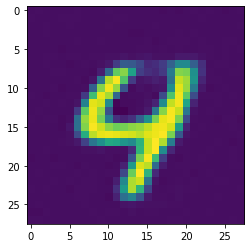

In [40]:
import matplotlib.pyplot as plt
with torch.no_grad():
    decoded = model_copy_vae.decode(rand_tensor)
print(decoded)
plt.imshow(decoded.view(28,28))

In [41]:
new = rand_tensor * w + w0
print(new)

tensor([[-0.2804, -0.0731]])


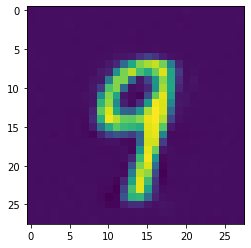

In [42]:
with torch.no_grad():
    counter_img = model_copy_vae.decode(new)
# plt.imshow(pick_model(new).view(28,28))
plt.imshow(counter_img.view(28,28))

alpha_i = tensor([[-0.2023, -0.0202],
        [-0.3439, -0.0343]])
tensor([0.8092, 0.2056])


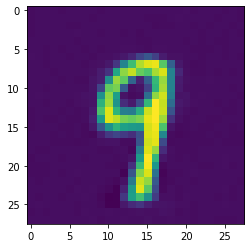

In [43]:
alpha_i = - (torch.t(z[0]) * w + w0) / torch.t(w) * w
print(f'{alpha_i = }')
print(z[1])
with torch.no_grad():
    org_recons_img = model_copy_vae.decode(z[0])
    plt.imshow(org_recons_img.view(28,28))

In [44]:
model_copy = model.VaeFinal_only_one_hidden_copy()
model_copy = helper.import_model_name_weights_copy(model_x=model_copy, activate_eval=True)
# dataset_test_4 = MyDataSet.MyDataSets_Subset_4(batch_size_train=-1)
with torch.no_grad():
    dataset_49 = MyDataSet.MyDataSets_Subset_4_9(batch_size_train=-1)
    img_49_batch, label_49_batch = next(iter(dataset_49.train_loader_subset_changed_labels))
    rec49, mu49, sigma49 = model_copy(img_49_batch.clone())
    z = mu49

MyDataSets.MyDataSets_Subset_4_9.__init__


In [45]:
iterweights = iter(pick_model.parameters())
w = next(iterweights).data
w0 = next(iterweights).data
print(w,w0)

tensor([[-0.4416, -0.2597]]) tensor([0.0283])


tensor([[-0.4416, -0.2597]]) tensor([0.0283])
tensor(0.0283)
alpha_i = tensor([-0.1536,  0.0288])
tensor([-0.2837,  0.2199])


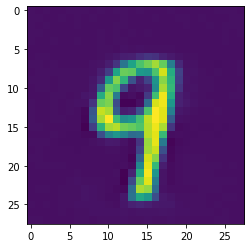

In [46]:
STEPS = 100
iterweights = iter(pick_model.parameters())
w = next(iterweights).data
w0 = next(iterweights).data
print(w,w0)
w = w[0]
w0 = w0[0]
print(w0)
alpha_i = - (torch.t(z[0]) * w + w0) / torch.t(w) * w
print(f'{alpha_i = }')
print(f'{z[0]}')
with torch.no_grad():
    org_recons_img = model_copy_vae.decode(z[0])
    plt.imshow(org_recons_img.view(28,28))
z_counter = z[0] + STEPS * alpha_i*w
# print(f'{z_counter = }')
# print(f'{torch.t(z[0]) = }')
# print(f'{torch.t(w) = }')
# print(f'{w.squeeze(dim = 0)[:] = }')
# with torch.no_grad():
#     z_counter_recons_img = model_copy_vae.decode(z_counter)
#     plt.imshow(z_counter_recons_img.view(28,28))
#     print(f'{z_counter = }')
# print(f'{z[0] = }')


z_counter = tensor([ 6.4996, -0.5273])
z[0] = tensor([-0.2837,  0.2199])


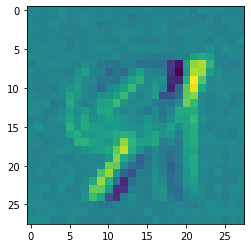

In [47]:
import torch
import model
import helper
model_copy_vae = model.VaeFinal_only_one_hidden_copy()
model_copy_vae = helper.import_model_name_weights_copy(model_x=model_copy_vae, activate_eval=True)
with torch.no_grad():
    z_counter_recons_img = model_copy_vae.decode(z_counter)
    plt.imshow(z_counter_recons_img.view(28,28))
    print(f'{z_counter = }')
print(f'{z[0] = }')

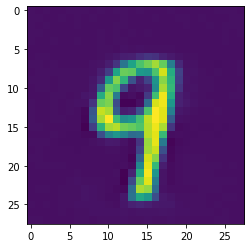

In [48]:
with torch.no_grad():
    org_recons_img = model_copy_vae.decode(z[0])
    plt.imshow(org_recons_img.view(28,28))

alpha_i = tensor([-0.1536,  0.0288])
tensor([-0.2837,  0.2199])
z = tensor([-0.2837,  0.2199])
z_counter = tensor([0.3946, 0.1452])
z_counter = tensor([0.3946, 0.1452])


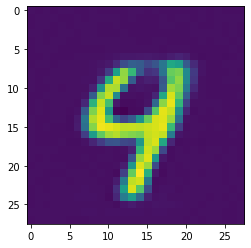

In [49]:
def plt_show_counter_with_steps(z,steps):
    STEPS = steps
    iterweights = iter(pick_model.parameters())
    w = next(iterweights).data[0]
    w0 = next(iterweights).data[0]
    alpha_i = - (torch.t(z) * w + w0) / torch.t(w) * w
    print(f'{alpha_i = }')
    print(f'{z}')
    z_counter = z + STEPS * alpha_i*w
    print(f'{z = }')
    print(f'{z_counter = }')

    with torch.no_grad():
        z_counter_recons_img = model_copy_vae.decode(z_counter)
        plt.imshow(z_counter_recons_img.view(28,28))
        print(f'{z_counter = }')

plt_show_counter_with_steps(z[0], 10)

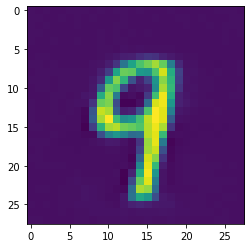

In [57]:
import matplotlib.pyplot as plt

def return_counter_with_steps(z,steps=20):
    STEPS = steps
    iterweights = iter(pick_model.parameters())
    w = next(iterweights).data[0]
    w0 = next(iterweights).data[0]
    alpha_i = - (torch.t(z) * w + w0) / torch.t(w) * w
    z_counter = z + STEPS * alpha_i*w

    with torch.no_grad():
        z_counter_recons_img = model_copy_vae.decode(z_counter)
        # plt.imshow(z_counter_recons_img.view(28,28))
        # print(f'{z_counter = }')

    return z_counter_recons_img.view(28,28)
plt.imshow(return_counter_with_steps(z=z[0],steps=0))
# plt.imshow(return_counter_with_steps(z=z[0],steps=100))

In [51]:
def return_counter_with_steps(z,steps=20):
    STEPS = steps
    iterweights = iter(pick_model.parameters())
    w = next(iterweights).data[0]
    w0 = next(iterweights).data[0]
    alpha_i = - (z * w + w0) / torch.t(w) * w
    # alpha_i = - (torch.t(z) * w + w0) / torch.t(w) * w
    z_counter = z + STEPS * alpha_i*w

    with torch.no_grad():
        z_counter_recons_img = model_copy_vae.decode(z_counter)
        # plt.imshow(z_counter_recons_img.view(28,28))
        # print(f'{z_counter = }')
    print(z_counter_recons_img.view(-1,1,28,28).shape)
    return z_counter_recons_img.view(-1,1,28,28)
counter_factuals = return_counter_with_steps(z=z,steps=20)
print(counter_factuals.shape)
# plt.imshow(return_counter_with_steps(z=z[0],steps=100))

torch.Size([11791, 1, 28, 28])
torch.Size([11791, 1, 28, 28])


torch.Size([11791, 1, 28, 28])


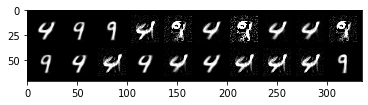

In [52]:
from torchvision.utils import make_grid
import numpy as np
with torch.no_grad():
    counter_factuals = return_counter_with_steps(z=z,steps=20)
    counter_factuals = counter_factuals.clip(0,1)
    counter_factuals = counter_factuals[:20]
    counter_factuals = make_grid(counter_factuals, 10, 5)
    # counter_factuals = make_grid(tensor=list(counter_factuals))
    # counter_factuals = test_images.numpy()
    counter_factuals = np.transpose(counter_factuals, (1, 2, 0))
    plt.imshow(counter_factuals)
    plt.show()

In [53]:
def return_counter_with_x_steps(z_one_image:torch.Tensor, steps_x_alpha_i:int=20):
    # STEPS = steps
    # STEPS = torch.linspace(1, steps_x_alpha_i, steps=steps_x_alpha_i)
    z_ones = torch.ones(steps_x_alpha_i+1)
    # torch.fill(z_ones,z_one_image.item())
    STEPS = torch.linspace(0, steps_x_alpha_i, steps=steps_x_alpha_i+1)

    STEPS = STEPS.unsqueeze(dim = 1)
    STEPS = STEPS * z_one_image
    print(f'{STEPS = }')
    print(f'{z_one_image = }')
    print(f'{z_ones = }')
    print(f'{STEPS = }')
    z_one_image = z_ones * torch.t(z_one_image)
    # z_one_image = z_one_image.repeat(2,steps_x_alpha_i)
    print('------')
    print(f'{z_one_image = }')
    # print(STEPS.unsqueeze(dim = 1))
    iterweights = iter(pick_model.parameters())
    w = next(iterweights).data[0]
    w0 = next(iterweights).data[0]
    alpha_i = - (z_one_image * w + w0) / torch.t(w) * w
    # z_counter = z + torch.t(STEPS) * alpha_i * w
    # z_counter = z + STEPS * torch.t(alpha_i) * w
    z_counter = z + STEPS * alpha_i * w

    with torch.no_grad():
        z_counter_recons_img = model_copy_vae.decode(z_counter)
        # plt.imshow(z_counter_recons_img.view(28,28))
        # print(f'{z_counter = }')
    print(z_counter_recons_img.view(-1, 1, 28, 28).shape)
    return z_counter_recons_img.view(-1, 1, 28, 28)


counter_factuals = return_counter_with_x_steps(z_one_image=z[0], steps_x_alpha_i=20)
print(counter_factuals.shape)

STEPS = tensor([[-0.0000,  0.0000],
        [-0.2837,  0.2199],
        [-0.5674,  0.4399],
        [-0.8511,  0.6598],
        [-1.1348,  0.8797],
        [-1.4185,  1.0997],
        [-1.7022,  1.3196],
        [-1.9859,  1.5395],
        [-2.2696,  1.7595],
        [-2.5533,  1.9794],
        [-2.8370,  2.1993],
        [-3.1207,  2.4193],
        [-3.4044,  2.6392],
        [-3.6881,  2.8591],
        [-3.9718,  3.0791],
        [-4.2555,  3.2990],
        [-4.5392,  3.5189],
        [-4.8229,  3.7389],
        [-5.1067,  3.9588],
        [-5.3904,  4.1787],
        [-5.6741,  4.3987]])
z_one_image = tensor([-0.2837,  0.2199])
z_ones = tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.])
STEPS = tensor([[-0.0000,  0.0000],
        [-0.2837,  0.2199],
        [-0.5674,  0.4399],
        [-0.8511,  0.6598],
        [-1.1348,  0.8797],
        [-1.4185,  1.0997],
        [-1.7022,  1.3196],
        [-1.9859,  1.5395],
        [-2.2696,  1

RuntimeError: The size of tensor a (21) must match the size of tensor b (2) at non-singleton dimension 0

In [54]:
import math
import numpy as np
def gaussian_kernel(x, sigma):
    return (1/(math.sqrt(2*math.pi*sigma**2))) * math.exp(-x**2 / (2*sigma**2))

def l1_distance(x,x_others) :
    dif = (x-x_others)
    dif = dif @ dif
    return dif

def kernel_dist
# Example usage:
a=np.asarray((1,2,3))
b=np.asarray((4,5,6))
print(l1_distance(a,b))
# print(gaussian_kernel(0, 1))
# print(gaussian_kernel(1, 1))
# print(gaussian_kernel(2, 1))


SyntaxError: invalid syntax (159852365.py, line 11)

In [55]:
import torch
# import z
def return_counter_with_x_steps(z_one_image:torch.Tensor, steps_x_alpha_i:int=20):
    # STEPS = steps
    # STEPS = torch.linspace(1, steps_x_alpha_i, steps=steps_x_alpha_i)
    z_ones = torch.ones(steps_x_alpha_i+1)
    # torch.fill(z_ones,z_one_image.item())
    STEPS = torch.linspace(0, steps_x_alpha_i, steps=steps_x_alpha_i+1)

    STEPS = STEPS.unsqueeze(dim = 1)
    STEPS = STEPS * z_one_image
    print(f'{STEPS = }')
    print(f'{z_one_image = }')
    print(f'{z_ones = }')
    print(f'{STEPS = }')
    z_one_image = z_ones * torch.t(z_one_image)
    # z_one_image = z_one_image.repeat(2,steps_x_alpha_i)
    print('------')
    print(f'{z_one_image = }')
    # print(STEPS.unsqueeze(dim = 1))
    iterweights = iter(pick_model.parameters())
    w = next(iterweights).data[0]
    w0 = next(iterweights).data[0]
    alpha_i = - (z_one_image * w + w0) / torch.t(w) * w
    # z_counter = z + torch.t(STEPS) * alpha_i * w
    # z_counter = z + STEPS * torch.t(alpha_i) * w
    z_counter = z + STEPS * alpha_i * w

    with torch.no_grad():
        z_counter_recons_img = model_copy_vae.decode(z_counter)
        # plt.imshow(z_counter_recons_img.view(28,28))
        # print(f'{z_counter = }')
    print(z_counter_recons_img.view(-1, 1, 28, 28).shape)
    return z_counter_recons_img.view(-1, 1, 28, 28)


counter_factuals = return_counter_with_x_steps(z_one_image=z[0], steps_x_alpha_i=20)
print(counter_factuals.shape)


STEPS = tensor([[-0.0000,  0.0000],
        [-0.2837,  0.2199],
        [-0.5674,  0.4399],
        [-0.8511,  0.6598],
        [-1.1348,  0.8797],
        [-1.4185,  1.0997],
        [-1.7022,  1.3196],
        [-1.9859,  1.5395],
        [-2.2696,  1.7595],
        [-2.5533,  1.9794],
        [-2.8370,  2.1993],
        [-3.1207,  2.4193],
        [-3.4044,  2.6392],
        [-3.6881,  2.8591],
        [-3.9718,  3.0791],
        [-4.2555,  3.2990],
        [-4.5392,  3.5189],
        [-4.8229,  3.7389],
        [-5.1067,  3.9588],
        [-5.3904,  4.1787],
        [-5.6741,  4.3987]])
z_one_image = tensor([-0.2837,  0.2199])
z_ones = tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.])
STEPS = tensor([[-0.0000,  0.0000],
        [-0.2837,  0.2199],
        [-0.5674,  0.4399],
        [-0.8511,  0.6598],
        [-1.1348,  0.8797],
        [-1.4185,  1.0997],
        [-1.7022,  1.3196],
        [-1.9859,  1.5395],
        [-2.2696,  1

RuntimeError: The size of tensor a (21) must match the size of tensor b (2) at non-singleton dimension 0